<a href="https://colab.research.google.com/github/mateocdev/ia_uniandes/blob/master/Perceptron_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
class Perceptron:
    def __init__(self,size=(2,1),activation_function=lambda x: x>0, learning_rate=0.8):
        self.learning_rate=learning_rate
        self.weights=np.ones(size)
        self.activation=activation_function  
    def predict(self,points):
        return self.activation(np.matmul(points,self.weights))
    def d(self,point,gt):
        #discrimiator function
        if point<gt: # gt -> groundtruth
            return 1
        else:
            return -1
    def train(self,points, groundtruth):
        prediction=self.predict(points)
        accuracy=np.sum(prediction==groundtruth)/len(prediction) 
        iterator=filter(lambda x: not(x[1]),enumerate(prediction==groundtruth)) 
        counter=0
        while accuracy<1.0:
            for index, val in iterator:
                update=(self.learning_rate*self.d(prediction[index],groundtruth[index])*points[index])
                self.weights+=np.reshape(update,(2,1)) # a +=b -> a=a+b
            prediction=self.predict(points)
            accuracy=np.sum(prediction==groundtruth)/len(prediction)
            iterator=filter(lambda x: not(x[1]),enumerate(prediction==groundtruth))
            counter+=1
        print(counter)
        return accuracy

In [ ]:
x,gt=make_blobs(n_samples=100000, centers=2, n_features=2,random_state=50)
gt=gt.reshape((len(gt),1))
plt.scatter(x[:,0],x[:,1],c=gt)

In [ ]:
perceptron=Perceptron()
perceptron.predict(x)
perceptron.train(x,gt)

3702


1.0

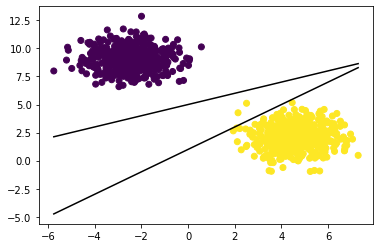

In [ ]:
x,gt=make_blobs(n_samples=1000, centers=2, n_features=2,random_state=42)
gt=gt.reshape((len(gt),1))
xfit=np.linspace(min(x[:,0]),max(x[:,0]))
plt.scatter(x[:,0],x[:,1],c=gt)
for m, b in [(1, 1), (0.5, 5)]:
    plt.plot(xfit, m * xfit + b, '-k')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')